## ----- PREDICTING PRICE OF USED OR 2ND HAND CARS -----

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Data processing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# for modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
df= pd.read_csv("D:\Datasets for Practice\cardata.csv")
df.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   company        301 non-null    object 
 2   Year           301 non-null    int64  
 3   Selling_Price  301 non-null    float64
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 23.6+ KB


In [6]:
sum(df.duplicated())

2

In [7]:
#display(df.drop_duplicates())

In [8]:
df.drop(['Car_Name','company'],axis=1,inplace=True)

In [9]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
#df.duplicated().sum()

In [12]:
#df1=df.iloc[:,0:4]
#df1.head()

In [13]:
#sns.pairplot(df)

In [14]:
print(df['Fuel_Type'].value_counts())
print("---------------")
print(df['Seller_Type'].value_counts())
print("---------------")
print(df['Transmission'].value_counts())
print("---------------")
print(df['Owner'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
---------------
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
---------------
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
---------------
Owner
0    290
1     10
3      1
Name: count, dtype: int64


In [15]:
df['Current Year']=2023
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [16]:
df['No.of Year']= df['Current Year']-df['Year']
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,No.of Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [17]:
df.drop(['Year','Current Year'],axis=1,inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No.of Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


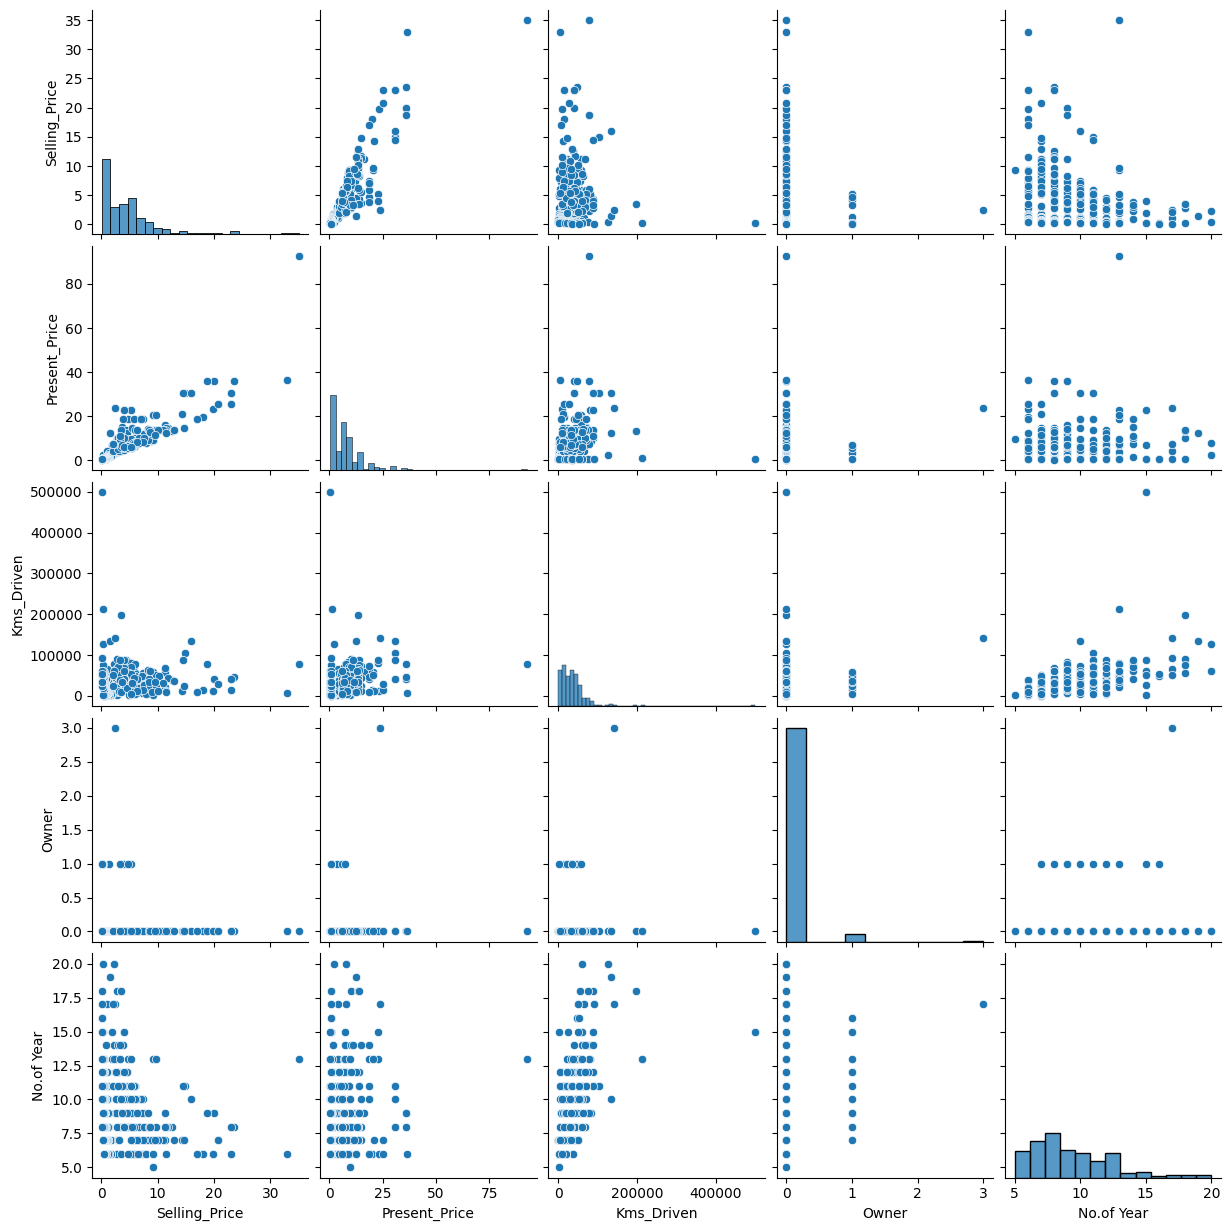

In [18]:
#first of all checking linearity,selling price & present price & SP & No.ofyear are quite linear
#might have Multicollinearity
sns.pairplot(df)

In [19]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
#ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [1])],remainder='passthrough')
#df=np.array(ct.fit_transform(df))

In [20]:
df = pd.get_dummies(df, drop_first=True)

In [21]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No.of Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True


In [22]:
df.replace({True:1,False:0})

,Selling_Price,Present_Price,Kms_Driven,Owner,No.of Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,7,1,0,0,1
297,4.00,5.90,60000,0,8,0,1,0,1
298,3.35,11.00,87934,0,14,0,1,0,1
299,11.50,12.50,9000,0,6,1,0,0,1


<Axes: >

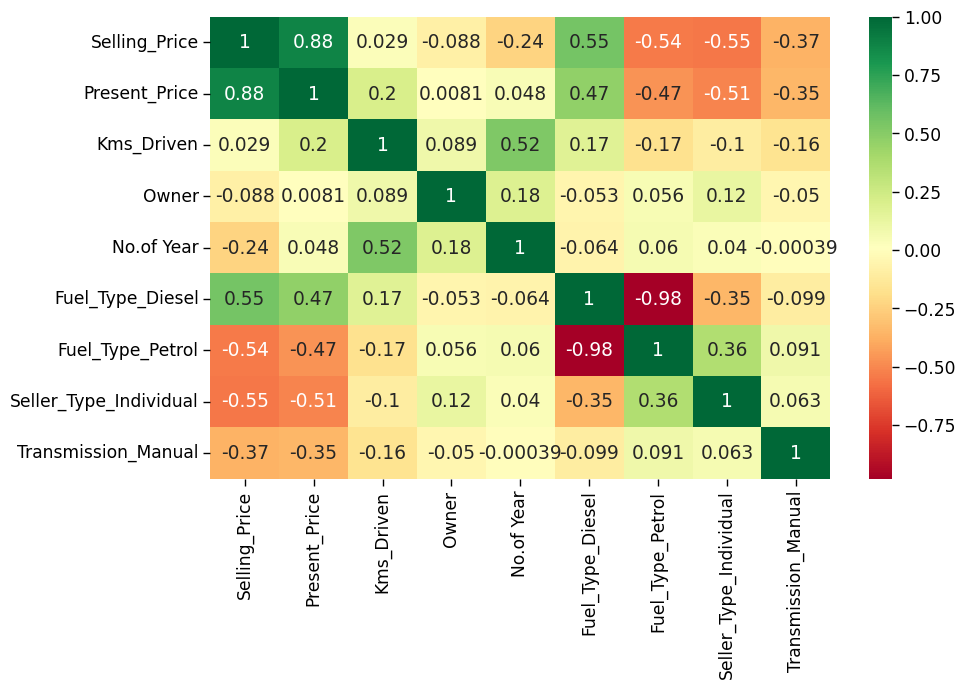

In [23]:
plt.figure(figsize=(10,6))
sns.set_context('paper',font_scale=1.4)
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='RdYlGn')

In [24]:
corr_matrix

,Selling_Price,Present_Price,Kms_Driven,Owner,No.of Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No.of Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_14976\874342521.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\Admin\AppData\Local\Temp\ipykernel_14976\874342521.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\Admin\AppData\Local\Temp\ipykernel_14976\87434252

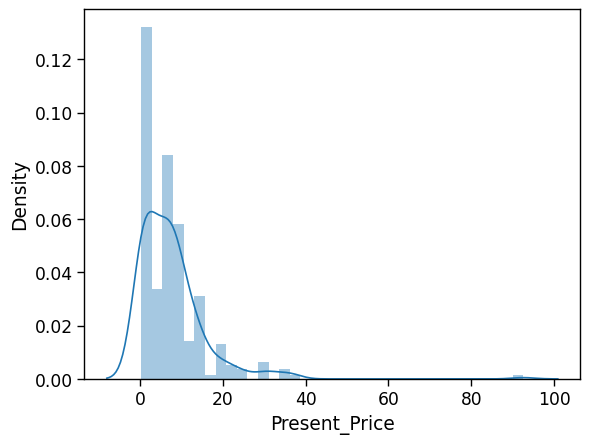

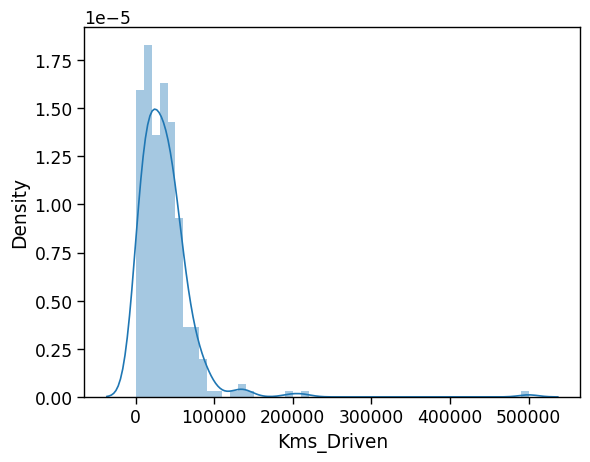

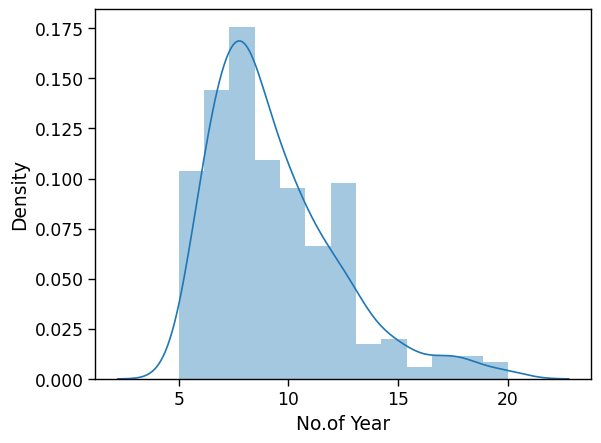

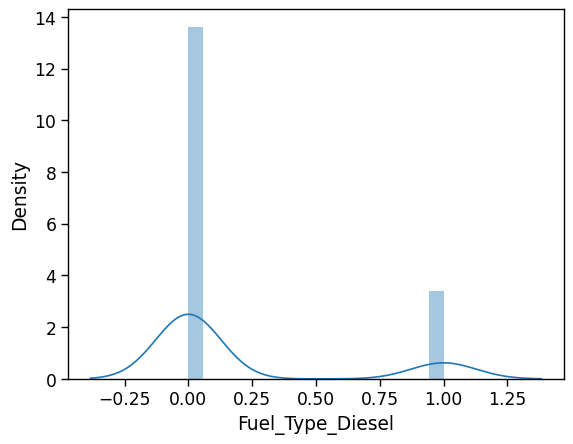

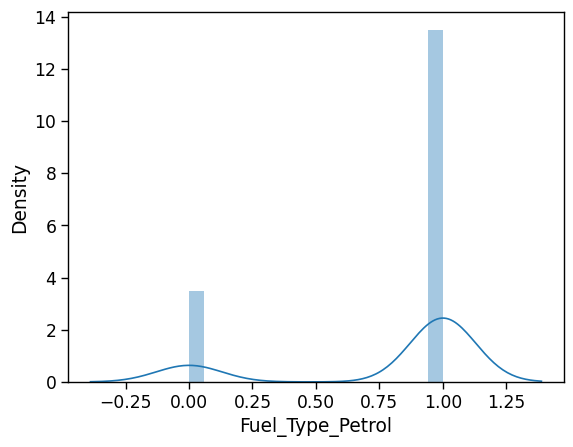

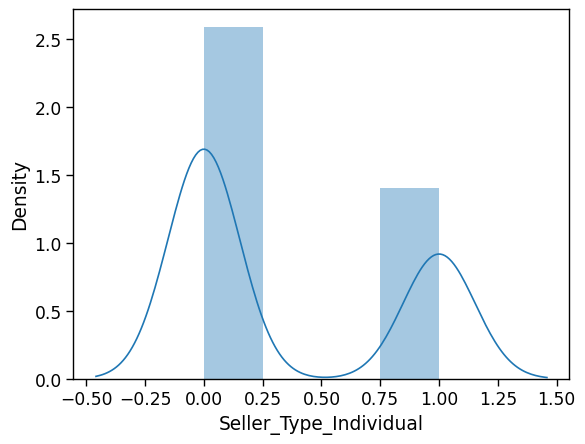

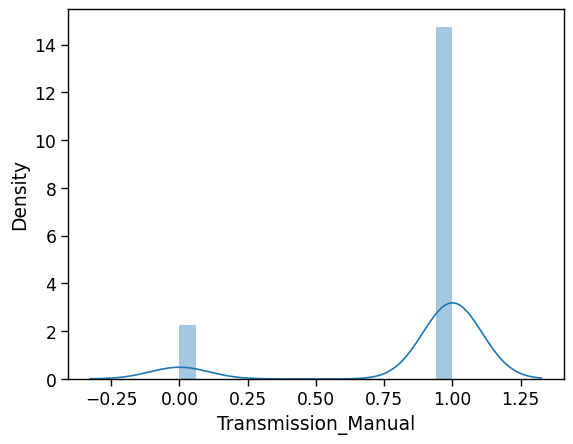

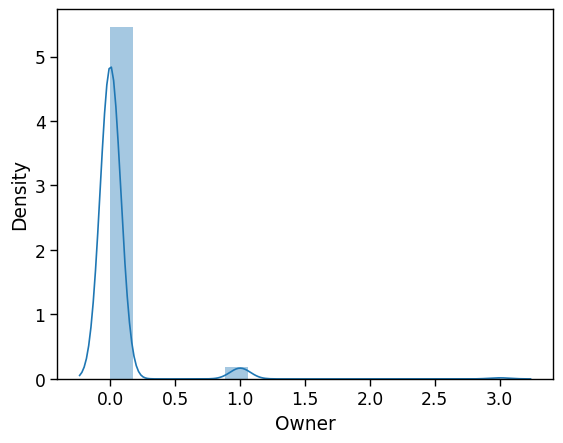

In [27]:
a=['Present_Price','Kms_Driven','No.of Year','Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual','Owner']
for i in a:
  plt.figure()
  sns.distplot(df[i])

In [ ]:
'''def model_summary(x,y):
  xtr=sm.add_constant(np.array(df[x]))
  model=sm.OLS(np.array(df[y]),xtr).fit()
  print(model.summary())'''

In [ ]:
#X=df.iloc[:,1:] 
#vif_data=pd.DataFrame()
#vif_data["feature"]=X.columns
#vif_data

In [ ]:
#vif_data["VIF"]=[variance_inflation_factor(X.values,i)
#for i in range(len(X.columns))]
#print(vif_data)

In [ ]:
#model_summary(['Present_Price','Kms_Driven'],'Selling_Price')

In [28]:
df.drop(columns=['Seller_Type_Individual','Transmission_Manual','Owner'],inplace=True)

In [29]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,No.of Year,Fuel_Type_Diesel,Fuel_Type_Petrol
0,3.35,5.59,27000,9,False,True
1,4.75,9.54,43000,10,True,False
2,7.25,9.85,6900,6,False,True
3,2.85,4.15,5200,12,False,True
4,4.60,6.87,42450,9,True,False


In [30]:
df.replace({True:1,False:0})

,Selling_Price,Present_Price,Kms_Driven,No.of Year,Fuel_Type_Diesel,Fuel_Type_Petrol
0,3.35,5.59,27000,9,0,1
1,4.75,9.54,43000,10,1,0
2,7.25,9.85,6900,6,0,1
3,2.85,4.15,5200,12,0,1
4,4.60,6.87,42450,9,1,0
...,...,...,...,...,...,...
296,9.50,11.60,33988,7,1,0
297,4.00,5.90,60000,8,0,1
298,3.35,11.00,87934,14,0,1
299,11.50,12.50,9000,6,1,0


In [34]:
X = df.iloc[:,1:].values
y = df.iloc[:,-6].values

In [36]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=1)

In [37]:
X_train.shape

(240, 5)

In [38]:
X_test.shape

(61, 5)

In [39]:
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [40]:
# Residual
y_pred = model.predict(X_test)
residual = y_test - y_pred

In [42]:
# HOMOSCEDASTICITY

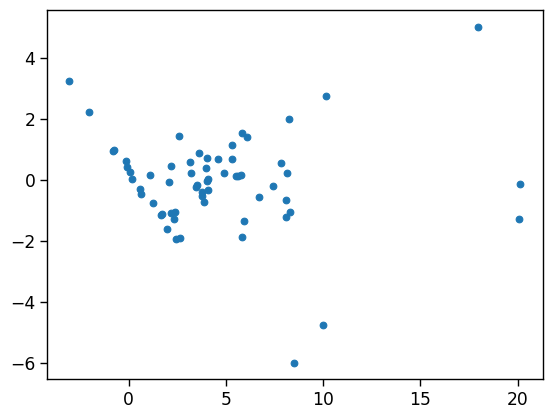

In [43]:
plt.scatter(y_pred,residual)

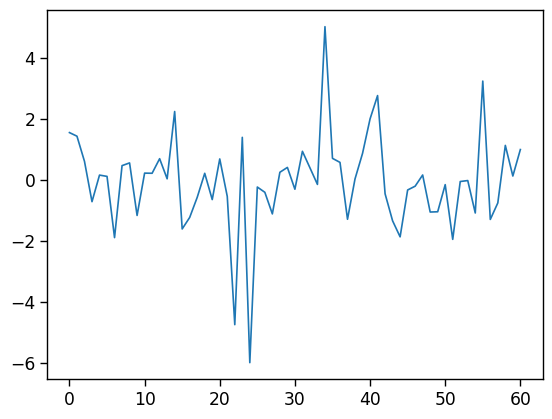

In [44]:
# AUTO CORRELATION OF RESIDUALS
plt.plot(residual)

In [45]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

MAE: 1.0562411930978237
MSE: 2.5129239927171256
RMSE: 1.5852204870986009


In [46]:
r2_score(y_test,y_pred)

0.8841659946707379

In [48]:
model.coef_

array([ 4.87895537e-01, -2.49622390e-06, -4.47238139e-01,  2.05367009e+00,
        2.03245301e-01])

In [49]:
model.intercept_

4.665352413453366

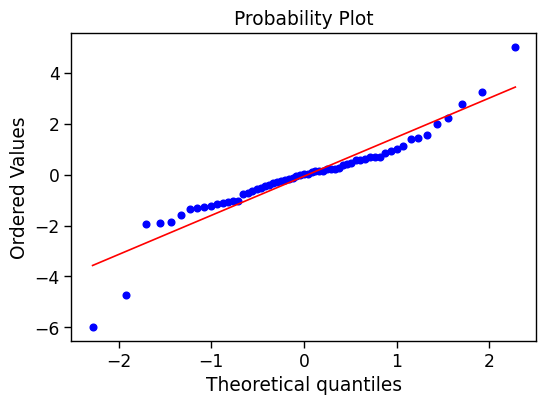

In [47]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()